In [45]:
import pickle
import pandas as pd
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 200)

import seaborn as sns
sns.set()
import numpy as np

In [46]:
multi_ref_bert = pickle.load(open('./pickles/multi_reference-bert_scores.pkl', 'rb'))
multi_ref_bleurt = pickle.load(open('./pickles/multi_reference-bleurt_scores.pkl', 'rb'))
multi_ref_bert.head(1)

,source,reference1,reference2,reference3,reference4,"bert_scores(cand=1, ref=1)","bert_scores(cand=1, ref=2)","bert_scores(cand=1, ref=3)","bert_scores(cand=1, ref=4)","bert_scores(cand=2, ref=1)",...,"bert_scores(cand=2, ref=3)","bert_scores(cand=2, ref=4)","bert_scores(cand=3, ref=1)","bert_scores(cand=3, ref=2)","bert_scores(cand=3, ref=3)","bert_scores(cand=3, ref=4)","bert_scores(cand=4, ref=1)","bert_scores(cand=4, ref=2)","bert_scores(cand=4, ref=3)","bert_scores(cand=4, ref=4)"
0,今年前两月广东高新技术产品出口３７．６亿美元,Export of High-tech Products in Guangdong in First Two Months This Year Reached 3.76 billion US dollars,Guangdong's export of new high technology products amounts to US$3.76 billion in first two months of this year,Guangdong Exports US$3.76 Billion Worth of High Technology Products in the First Two Months of This Year,"In the first 2 months this year, the export volume of new hi-tech products in Guangdong Province reached 3.76 billion US dollars.",1.0,0.932098,0.931419,0.951943,0.932098,...,0.967706,0.937403,0.931419,0.967706,1.0,0.926453,0.951943,0.937403,0.926453,1.0


In [47]:
wmt_mst_seg = pickle.load(open('./pickles/wmt_mst_seg_toen_scored.pkl', 'rb'))
wmt_mst_seg.head(1)

,lp,system,sid,sentBLEU,score,output,reference,source,year,bert_score,bleurt
560,ro-en,uedin-pbmt,851,0.133802,0.77061,Sometimes you do more harm if you bring in players who are not needed.\n,Sometimes more harm is done by adding unnecessary players to what you really need.\n,Uneori faci mai mult rău dacă aduci jucători care nu sunt necesari.\n,2016,0.923424,0.389199


# Distributions of score(ref, ref)

In [48]:
def baseline_dist(metric='bert_score'):
    widths = []
    for i in range(0, 100):
        sample = wmt_mst_seg[metric].sample(16)
        max_, min_ = sample.max(), sample.min()
        width = max_ - min_
        widths.append(width)
    sns.distplot(widths)

### bert_score

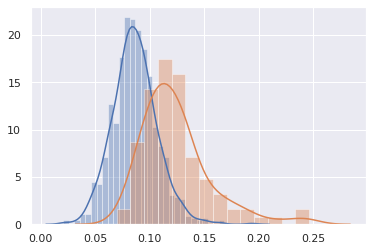

In [49]:
diffs = multi_ref_bert.max(axis=1) - multi_ref_bert.min(axis=1)
sns.distplot(diffs)
generate_dist()

In [50]:
print(diffs.quantile(q=0.9))
large_diffs_bert = multi_ref_bert[diffs > diffs.quantile(q=0.97)]
large_diffs_bert[['reference1', 'reference2', 'reference3', 'reference4']]

0.11183863282203675


,reference1,reference2,reference3,reference4
30,African National Congress Opposes Sanctions against Zimbabwe,African National Congress opposing sanctions against Zimbabwe,ANC opposes sanctions against Zimbabwe,African National Congress of South Africa opposes sanctions over Zinbarbwe
31,"Xinhua News Agency, Johannesburg, March 18 (Reporter Gao Yuan) Motlanthe, secretary general of African National Congress (ANC), the ruling party of South Africa, criticized here on the 18th the We...","Xinhua News Agency, Johannesburg, March 18 (Reporter: Gao Yuan) -- Kgalema Motlanthe, Secretary General of South Africa's ruling party African National Congress (ANC), criticizes the sanction agai...","Xinhua New Agency report of March 18 from Johannesburg (by staff reporter Gao Yuan)-Mortrant, Secretary General of African National Congress(ANC), South Africa's ruling party, lashed out at Wester...","Johannesburg, March 18, (Xinhua)-- (Gao Yuan reports) Chairman of African National Congress of South Africa, Motlanthe criticizes western countries like the US and UK on pressing Zinbarbwe to act ..."
43,"The athletes were warmly welcomed at DeGaulle Airport by Buffet, the French minister for Youth and Sports, Sai Luoyale, the ministerial representative in charge of family and children and the disa...","Minister Buffet of Ministry of Youth and Sport, Minister Segolene Royal with delegated responsibility for Childhood and the Family, and the Disabled, and other parties concerned welcome the athlet...","They were warmly greeted at the de Gaulle Airport by French Sports Minster Buffet, the representative of Minister for the Family, Children and the Disabled, S. Royale, and other related figures.","At the Airport De Gaule, the Athletes were cordially welcomed by the Minister of French Sport Ministry of Young People Bifei, representative of Ministers in charge of affairs of family, enfant and..."
48,Jordan to Come Back from his Recovery of Injury as Early as Sunday,Jordan may come back as early as this Sunday,Jordan to Return from Injury on Sunday at the Earliest,Jordon will come out again on Sunday as the possible earliest date
82,The Security Bureau of Hong Kong Special Administrative Region completed the consultation work on the computer-related crimes last year and will make amendments to the laws so as to combat any com...,The Security Bureau of Hong Kong Special Administrative Region has completed the consultation on computer crimes last year. The Bureau is initiating some legislation changes in order to better con...,The Security Bureau of the Hong Kong Special Administrative Region completed consultancy on computer-related crimes last year and will amend legal rules to crack down on crimes using computers.,Hongkong SAR Security Beareau has completed the concerning consulting work and ammended regulations to strick upon any crime by the computer.
118,Indonesia's Parliament Speaker Arraigned in Court,Trial of Indonesian speaker opens,Indonesian Parliament Speaker Stands Trial,Indonesia Congress Speaker on trial
121,These funds were said to have been used later in the 1999 election in financing the campaign for the Federation of Functional Group (Golkar) led by Tanrung.,It is rumored that the fund was used by Tandjung led Golkar Party to finance its election campaign in 1999.,"These funds have allegedly been used for the political party Tandjung led, Golkar, in its elections in 1999.",The embezzeled money was said to be used in the election campaign of Partai Golongan Karya (Indonesia Professional Group) lead by Tanjung in 1999.
125,"Launch of ""Endeavour"" Delayed due to Problem in Robotic Arm","Launch of ""Endeavour"" delayed by robotic arm problems",Endeavor Launch Delayed for Robotic Arm Breakdown,Endeavor lauch date posponed for robot hand trouble
295,ABC published this exclusive interview on the same day.,"The special report was published the same day in ""Albacete Newspaper"".",Abesie published the interview on the same day.,Albacete publishe

### bleurt

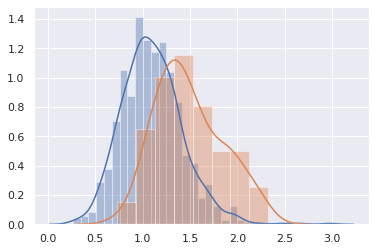

In [51]:
diffs = multi_ref_bleurt.max(axis=1) - multi_ref_bleurt.min(axis=1)
sns.distplot(diffs)
generate_dist(metric='bleurt')

In [52]:
print(diffs.quantile(q=0.9))
large_diffs_bleurt = multi_ref_bleurt[diffs > diffs.quantile(q=0.97)]
large_diffs_bleurt[['reference1', 'reference2', 'reference3', 'reference4']]

1.500282555818558


,reference1,reference2,reference3,reference4
30,African National Congress Opposes Sanctions against Zimbabwe,African National Congress opposing sanctions against Zimbabwe,ANC opposes sanctions against Zimbabwe,African National Congress of South Africa opposes sanctions over Zinbarbwe
48,Jordan to Come Back from his Recovery of Injury as Early as Sunday,Jordan may come back as early as this Sunday,Jordan to Return from Injury on Sunday at the Earliest,Jordon will come out again on Sunday as the possible earliest date
66,ECB Officials Said Economic Recovery in Euro Area will Accelerate within the Year,European Central Bank forecasts accelerated economic rebound in Euro area,ECB Official: Euro Zone Economic Rebound to Speed Up within the Year,"Euro zone economy will speedup to rise this year, European central bank official said"
81,"At the recent Transnational Organized Crime Conference (TOCC) held in Hong Kong, head of the UN Commission on Narcotic Drugs pointed out that online drug dealing will be a new challenge for the la...",A cross border drug trafficking forum has recently been held in Hong Kong. The person in charge of the Commission of Narcotic Drugs of United Nations has pointed out during the forum that drug tra...,A chief officer from the United Nations Narcotics Commission pointed out at a symposium on cross-territory organized crime held recently in Hong Kong that Internet drug trafficking would pose a ne...,"on the workshop for transnational organized crimes,UN International Drug Committee pointed out that drug trafficking on net is the new chanllenge to the law executing instrument."
82,The Security Bureau of Hong Kong Special Administrative Region completed the consultation work on the computer-related crimes last year and will make amendments to the laws so as to combat any com...,The Security Bureau of Hong Kong Special Administrative Region has completed the consultation on computer crimes last year. The Bureau is initiating some legislation changes in order to better con...,The Security Bureau of the Hong Kong Special Administrative Region completed consultancy on computer-related crimes last year and will amend legal rules to crack down on crimes using computers.,Hongkong SAR Security Beareau has completed the concerning consulting work and ammended regulations to strick upon any crime by the computer.
83,African College Students Appealing not to let Africa Become the Marginalized Area of New Technology,African college students want new technologies to flow into Africa,"African College Students Call for Africa Not to Become ""Peripheral Area"" of New Technology",African university students appeal not let Africa become marginalized in the new technology field
125,"Launch of ""Endeavour"" Delayed due to Problem in Robotic Arm","Launch of ""Endeavour"" delayed by robotic arm problems",Endeavor Launch Delayed for Robotic Arm Breakdown,Endeavor lauch date posponed for robot hand trouble
230,NTT Communication Infuses Blood into an Internet Company,NTT Communications injects more funds to an Internet company,NTT Telecommunication Finances an Internet Company,NTT Telecommunication Co. Transfuses blood to an Internet company
235,"In the past few years, Verio has been losing money without making any profit. NTT Communication has successively invested a total of 2.16 billion US dollars in the company.","In the past several years, Verio has never made any money. NTT Communications has already injected US$2.16 billion into the Company in several funding arrangements.","During the past few years, NTT Telecommunication Corporation has injected US$2.16 billion in total into Verio, which has kept running in red.","In the past few years, Verio only lost, never gained. NTT telecommunication company invested 2.16 billion USD to it."
243,LURD anti-government armed forces have been engaged in a war against the Liberian President Taylor since 2000.,LURD has commenced their war against the Liberian President Taylor in 2000.,The LUR

### Intersection of large diffs

In [63]:
large_diffs_intersection = large_diffs_bert.index.intersection(large_diffs_bleurt.index)
multi_ref_bert.iloc[large_diffs_intersection][['reference1', 'reference2', 'reference3', 'reference4']]

,reference1,reference2,reference3,reference4
30,African National Congress Opposes Sanctions against Zimbabwe,African National Congress opposing sanctions against Zimbabwe,ANC opposes sanctions against Zimbabwe,African National Congress of South Africa opposes sanctions over Zinbarbwe
48,Jordan to Come Back from his Recovery of Injury as Early as Sunday,Jordan may come back as early as this Sunday,Jordan to Return from Injury on Sunday at the Earliest,Jordon will come out again on Sunday as the possible earliest date
82,The Security Bureau of Hong Kong Special Administrative Region completed the consultation work on the computer-related crimes last year and will make amendments to the laws so as to combat any com...,The Security Bureau of Hong Kong Special Administrative Region has completed the consultation on computer crimes last year. The Bureau is initiating some legislation changes in order to better con...,The Security Bureau of the Hong Kong Special Administrative Region completed consultancy on computer-related crimes last year and will amend legal rules to crack down on crimes using computers.,Hongkong SAR Security Beareau has completed the concerning consulting work and ammended regulations to strick upon any crime by the computer.
125,"Launch of ""Endeavour"" Delayed due to Problem in Robotic Arm","Launch of ""Endeavour"" delayed by robotic arm problems",Endeavor Launch Delayed for Robotic Arm Breakdown,Endeavor lauch date posponed for robot hand trouble
423,"He said: ""Only when both sides want to realize peace can peace be realized.""","He said, ""Peace can only be achieved when both sides are willing to come forth for it"".","Peace is impossible unless intended by both sides,'' he said. \tHe said, only if the two sides want peace, peace can be the reality.""",None
429,Stocks Plummet in New York Exchange,New York stock market closed lower,New York Stock Market Plunges,NYSE falls
477,Putin Delivered State of the Union Address,Russian President's Address to Federal Assembly,Putin Delivered State of Union Address,Putin released State of Union Address
717,"Aviation Safety Council of Taiwan (ASC) Repeatedly Delayed Investigation Report on Singapore Airlines Crash, Causing Prosecutors to Smell a Rat",Singapore Airlines' crash in Taiwan: Aviation Safety Council has delayed its report; prosecutor's office is asking why,"Singapore Airlines Air Crash Investigation Report: FSCT Delays Over And Again, Prosecutors Suspect Untold Reasons","Singapore airline plan disaster investigation report Taiwan Aviation Security Association dragged on time and again, the prucurator suspected secret in it"
758,Strip alert means that planes are kept in readiness for emergent take-off at any time.,'Strip alerts' refer to warplanes at ready-to-go condition that can take off at short notices.,Readiness on the runway means the aircraft are readied on the runway for emergency take-offs at any time.,Standby on the runway measures means the plane is standing by and can urgently take off at any time.
